### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exibir gráficos diretamente no notebook
%matplotlib inline



In [4]:
# Adiciona a coluna "loja" para identificar cada loja no DataFrame
loja['loja'] = 'loja 1'
loja2['loja'] = 'loja 2'
loja3['loja'] = 'loja 3'
loja4['loja'] = 'loja 4'

# Junta todos os dados em um único DataFrame chamado "df"
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


In [5]:
df.columns


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')

#1. Análise do faturamento


In [6]:
faturamento_lojas = df.groupby('loja')['Preço'].sum().sort_values()
faturamento_lojas


,Preço
loja,
loja 4,1384497.58
loja 3,1464025.03
loja 2,1488459.06
loja 1,1534509.12


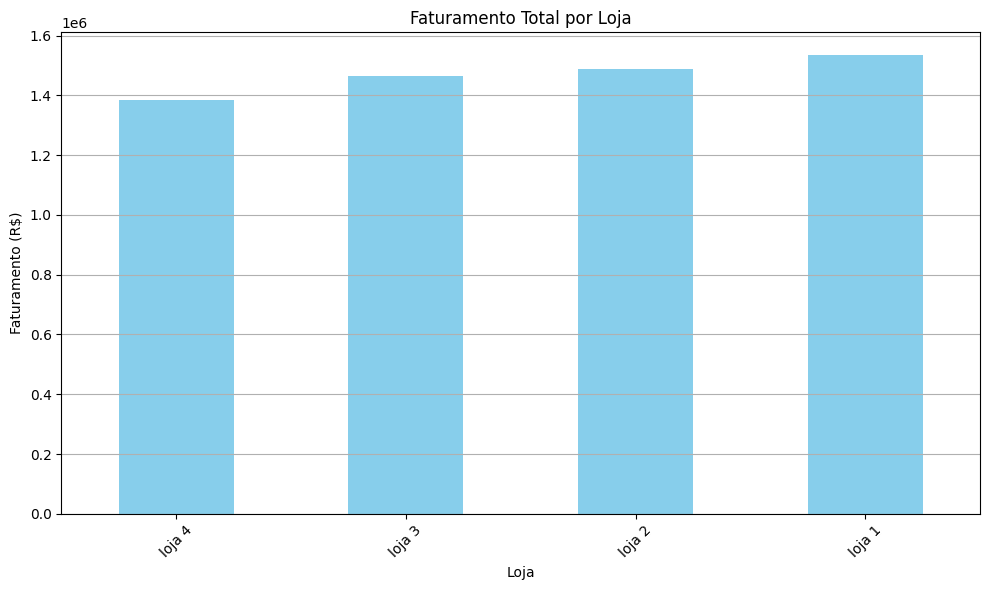

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
faturamento_lojas.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Relatório de Análise de Faturamento

Após a análise do faturamento total das quatro lojas, verificamos que:

- A **Loja 4** apresentou o **menor faturamento**, indicando que essa unidade teve a menor receita total no período analisado.
- A **Loja 1** foi a que obteve o **maior faturamento**, mostrando uma performance comercial superior às demais.

Esse resultado sugere que, do ponto de vista financeiro, a Loja 4 pode ser considerada a menos rentável atualmente, o que pode indicar uma oportunidade para reavaliação do negócio, seja por meio de ações de melhoria ou até uma possível venda.

O gráfico abaixo ilustra visualmente essa comparação do faturamento entre as lojas.


# 2. Vendas por Categoria


In [8]:
vendas_categoria = df['Categoria do Produto'].value_counts()
vendas_categoria


,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


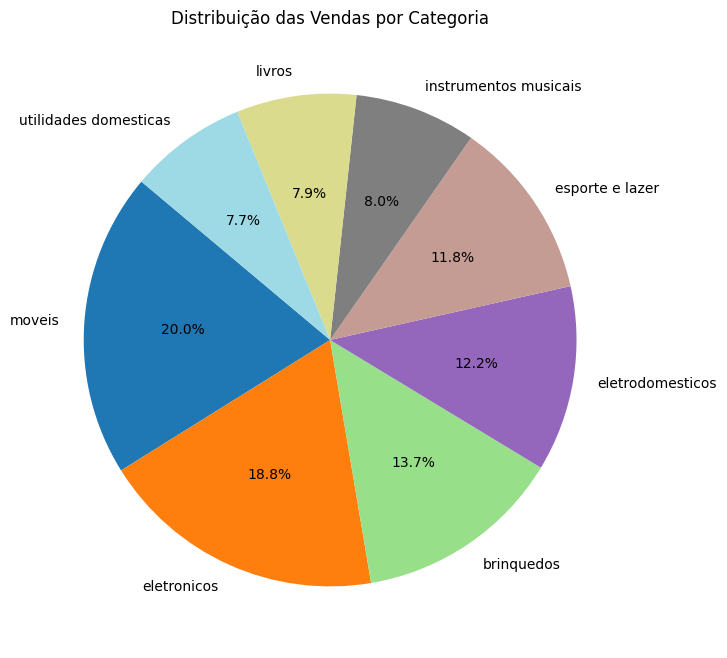

In [9]:
plt.figure(figsize=(8,8))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Distribuição das Vendas por Categoria')
plt.ylabel('')
plt.show()


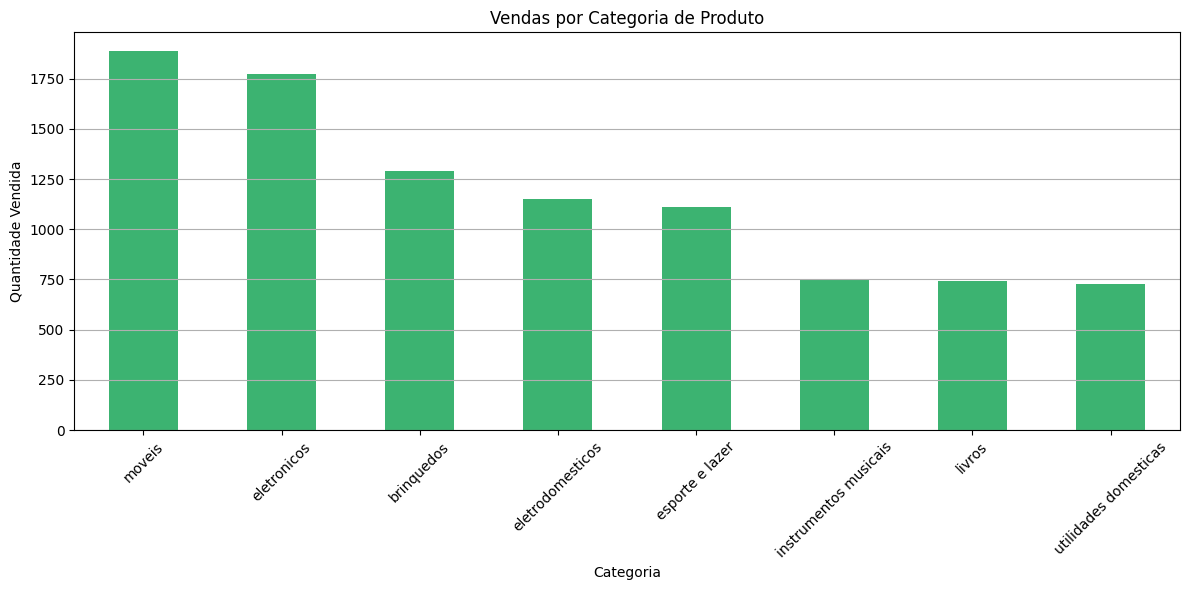

In [10]:
plt.figure(figsize=(12,6))
vendas_categoria.plot(kind='bar', color='mediumseagreen')
plt.title('Vendas por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Análise das Vendas por Categoria

A análise das vendas por categoria mostrou que:

- A categoria **Móveis** é a mais popular, respondendo por uma grande parte das vendas totais.
- Em seguida, temos as categorias **Eletrônicos** e **Brinquedos** com alta demanda.
- As categorias como **Instrumentos Musicais**, **Livros** e **Utilidades Domésticas** tiveram menor volume de vendas, indicando menor preferência ou nicho específico.

Esse panorama é importante para orientar decisões de marketing e estoque, focando mais nos produtos que geram maior receita.


# 3. Média de Avaliação das Lojas

In [11]:
media_avaliacao = df.groupby('loja')['Avaliação da compra'].mean()
media_avaliacao


,Avaliação da compra
loja,
loja 1,3.976685
loja 2,4.037304
loja 3,4.048326
loja 4,3.995759


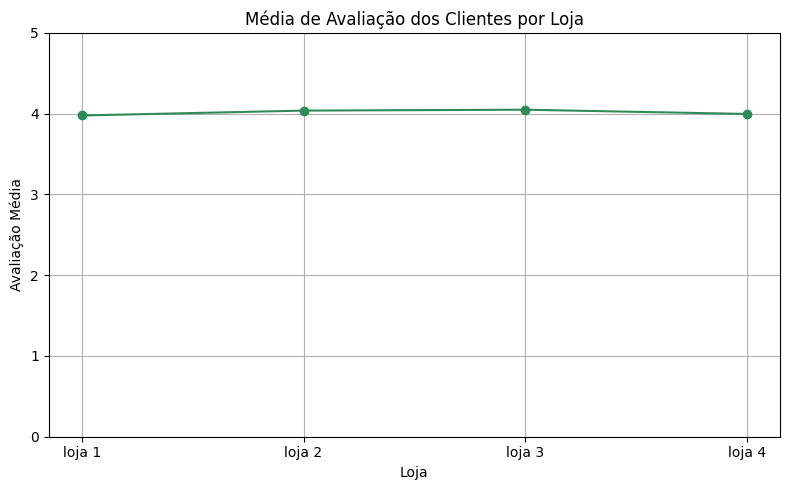

In [18]:
# Gráfico de linha com marcadores para média de avaliação por loja

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(
    media_avaliacao.index,
    media_avaliacao.values,
    marker='o',
    linestyle='-',
    color='seagreen'
)

plt.title('Média de Avaliação dos Clientes por Loja')
plt.ylabel('Avaliação Média')
plt.xlabel('Loja')
plt.ylim(0, 5)  # Escala de 0 a 5
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [13]:
vendas_produto = df['Produto'].value_counts()


In [14]:
print("10 Produtos Mais Vendidos:")
print(vendas_produto.head(10))

print("\n10 Produtos Menos Vendidos:")
print(vendas_produto.tail(10))


10 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64

10 Produtos Menos Vendidos:
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


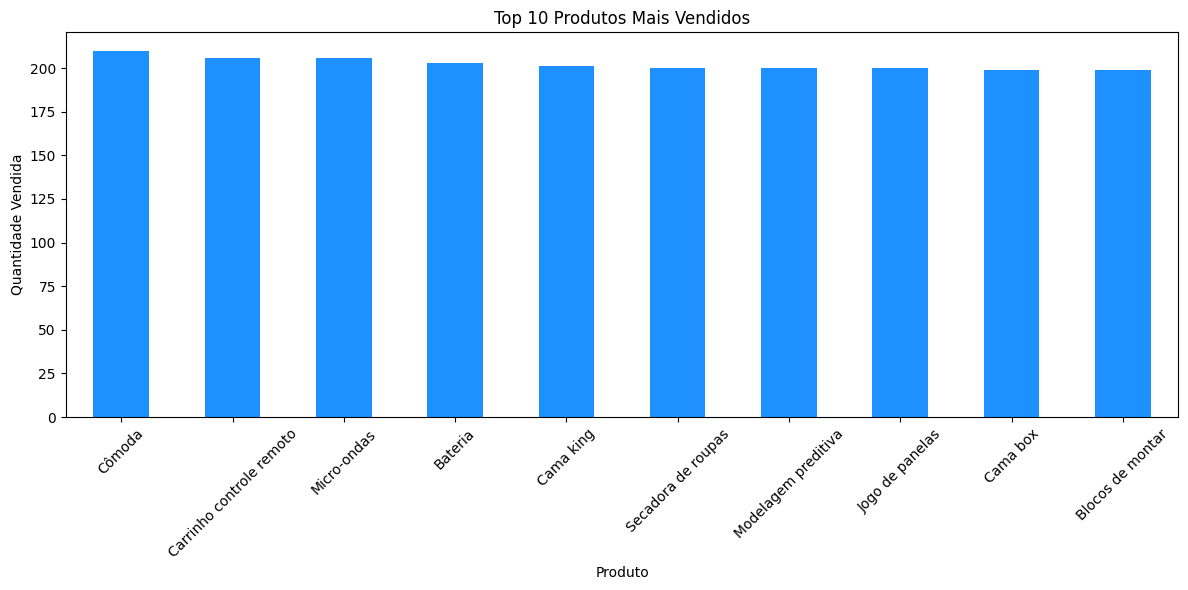

In [15]:
plt.figure(figsize=(12,6))
vendas_produto.head(10).plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [16]:
frete_medio = df.groupby('loja')['Frete'].mean()
frete_medio


,Frete
loja,
loja 1,34.691805
loja 2,33.621941
loja 3,33.074464
loja 4,31.278997


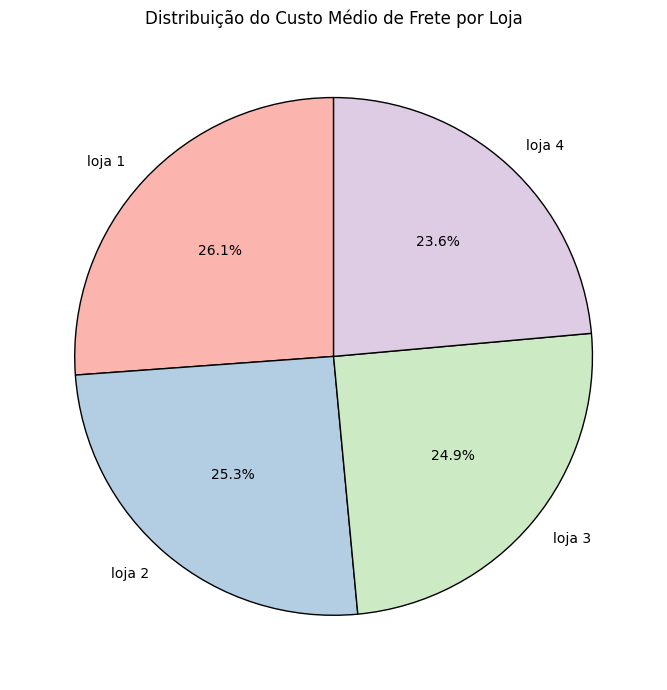

In [17]:
# Gráfico de pizza para o frete médio por loja

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
frete_medio.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribuição do Custo Médio de Frete por Loja')
plt.ylabel('')  # Remove o label do eixo Y
plt.tight_layout()
plt.show()



## Relatório Final

# Relatório Final - Análise das Lojas Alura Stone

## 1. Faturamento Total por Loja

- A Loja 4 tem o menor faturamento total, indicando menor geração de receita.
- A Loja 1 é a que mais faturou, seguida pelas lojas 3 e 2.

## 2. Vendas por Categoria de Produto

- A categoria "Móveis" é a mais vendida.
- Eletrônicos e brinquedos também têm bom volume de vendas.
- Categorias como "Instrumentos Musicais" e "Livros" são as menos vendidas.

## 3. Média de Avaliação dos Clientes por Loja

- A Loja 3 apresenta a melhor média de avaliação (aproximadamente 4,05).
- A Loja 4, apesar do menor faturamento, tem uma avaliação média razoável (3,99).
- A Loja 1, maior faturamento, tem a menor avaliação média (3,98).

## 4. Produtos Mais e Menos Vendidos

- Os 10 produtos mais vendidos têm em torno de 200 unidades vendidas.
- Os 10 produtos menos vendidos têm em torno de 157 a 172 unidades.
- A diferença sugere vendas relativamente equilibradas entre os produtos.

## 5. Custo Médio de Frete por Loja

- A Loja 4 apresenta o menor custo médio de frete (R$ 31,28).
- A Loja 1 tem o custo médio de frete mais alto (R$ 34,69).

---

# Conclusão e Recomendação

Considerando todas as métricas:

- A Loja 4 tem o menor faturamento, mesmo com custo médio de frete competitivo e avaliações razoáveis.
- As outras lojas apresentam faturamentos maiores e avaliações similares.
- Recomenda-se vender a Loja 4 para focar investimentos nas lojas que apresentam melhor desempenho financeiro.

---

*Relatório gerado com base na análise dos dados de vendas, avaliações e fretes das lojas da Alura Stone.*
